In [ ]:
'''
Q1)
(Digital Paths)
Write a generic Matlab/Python function

[paths info] = find paths(I, x1, y1, x2, y2, V, path type), (1)

which will find all 4, 8- and m-paths between two points (x1,y1) and (x2,y2) in an image.
Inputs:
I: An image as 2D matrix,
x1,y1,x2,y2: coordinates of the two points
V: set V as an array,
path type: type of path ( = 4, 8 or 10 (10 for m path))

1

Output: array of structures containing all the paths of desired type, their lengths and the shortest path (paths
will be stored as cell array)
Test your code on the image segment shown in Figure 1 (write a separate test script to do so), for V = {4,2}
and find all the 4, and m-paths between p and q.
'''

In [ ]:
I=[[1,0,3,2,4],[4,3,4,0,2],[2,2,1,3,0],[2,4,0,2,3],[3,2,4,1,0]]
x1,y1,x2,y2 = 3,0,1,4
V=[2,4]
path=4

In [ ]:
I 

[[1, 0, 3, 2, 4],
 [4, 3, 4, 0, 2],
 [2, 2, 1, 3, 0],
 [2, 4, 0, 2, 3],
 [3, 2, 4, 1, 0]]

In [ ]:
I[3][0]

2

In [ ]:
path={}
path_no=0
path_len=0

In [ ]:
def eight_ngbs(x1,y1):
    m=[-1,0,1]
    ngbs=[]
    for i in m:
        for j in m:
            if x1+i >= 0 and y1+j >= 0 and x1+i < len(I) and y1+j < len(I[0]):
                p = I[x1 + i][y1 + j]
                if p in V:
                    ngbs.append([x1+i,y1+j])
    ngbs.remove([x1,y1])
    return ngbs

In [ ]:
eight_ngbs(x1,y1)

[[2, 0], [2, 1], [3, 1], [4, 1]]

In [ ]:
def four_ngbs(x1,y1):
    m=[-1,0,1]
    ngbs=[]
    for i in m:
        for j in m:
            if x1+i >= 0 and y1+j >= 0 and x1+i < len(I) and y1+j < len(I[0]):
                p = I[x1 + i][y1 + j]
                if p in V:
                    if y1+j == y1 or x1+i == x1:
                        ngbs.append([x1+i,y1+j])
    ngbs.remove([x1,y1])
    return ngbs

In [ ]:
four_ngbs(x1,y1)

[[2, 0], [3, 1]]

In [ ]:
def m_ngbs(x1,y1):
    m=[-1,0,1]
    ngbs=[]
    for i in m:
        for j in m:
            if x1+i >= 0 and y1+j >= 0 and x1+i < len(I) and y1+j < len(I[0]):
                p = I[x1 + i][y1 + j]
                if p in V:
                    if y1+j == y1 or x1+i == x1:
                        ngbs.append([x1+i,y1+j])
                    else:
                        p_four_ngbs=four_ngbs(x1,y1)
                        q_four_ngbs=four_ngbs(x1+i,y1+j)
                        intersection = [value for value in p_four_ngbs if value in q_four_ngbs]
                        if len(intersection) == 0:
                            ngbs.append([x1+i,y1+j])
    ngbs.remove([x1,y1])
    return ngbs

In [ ]:
m_ngbs(x1,y1)

[[2, 0], [3, 1]]

In [ ]:
def path_existance(x1,y1,x2,y2,path_type):
    if path_type == 4:
        ngbs=four_ngbs(x1,y1)
        for ngb in ngbs:
            if [x2,y2] in ngbs:
                
                return True
            else:
                ngbs_=four_ngbs(ngb[0],ngb[1])
                for i in ngbs_:
                    if i not in ngbs:
                        ngbs.append(i)
            return False

    elif path_type == 8:
        ngbs=eight_ngbs(x1,y1)
        for ngb in ngbs:
            if [x2,y2] in ngbs:
                
                return True
            else:
                ngbs_=eight_ngbs(ngb[0],ngb[1])
                for i in ngbs_:
                    if i not in ngbs:
                        ngbs.append(i)
        return False
    else :
        ngbs=m_ngbs(x1,y1)
        for ngb in ngbs:
            if [x2,y2] in ngbs:
                
                return True
            else:
                ngbs_=m_ngbs(ngb[0],ngb[1])
                for i in ngbs_:
                    if i not in ngbs:
                        ngbs.append(i)
        return False

In [ ]:
path_existance(3,0,1,4,8)

True

In [ ]:
pathss=[]
def paths(x1,y1,x2,y2,ptype):
    paths_={}
    explored=[(x1,y1)]
    if path_existance(x1,y1,x2,y2,ptype):
        ngbs=four_ngbs(x1,y1)
        if (x2,y2) not in ngbs:
            for ngb in ngbs:
                if (ngb[0],ngb[1]) not in explored:
                    paths_[(x1,y1)]=(ngb[0],ngb[1])
                    pathss.append(paths_)
            for k in paths_.values():
                explored.append((k[0],k[1]))
                paths(k[0],k[1],x2,y2,ptype)
        else:
            return
    else:
        return "path doesn't exist" 

In [ ]:
paths(3,0,1,4,8)

RecursionError: ignored

In [ ]:
I

[[1, 0, 3, 2, 4],
 [4, 3, 4, 0, 2],
 [2, 2, 1, 3, 0],
 [2, 4, 0, 2, 3],
 [3, 2, 4, 1, 0]]

In [ ]:
'''
Q3. 
(Digital Image Creation - Circles) Write a generic Matlab/Python function

[I] = create discs(M, N, border, n, r1, r2, Vf , Vb), (2)
which will create a 8-bit grayscale image similar to Figure 2. This image is of size M × N, additionally it has a
black border around it of thickness border. Thus, the size of complete image is (M+2×border)×(N +2×border).
This image contains n non-overlapping discs of radius uniformly distributed in [r1, r2]. Centers of each of these
discs are obtained from a uniform distribution over all possible pixel locations in the image. The selected centers
should be such that the discs are non-overlapping. For randomly selecting the centers of these non-overlapping
discs, you might need to increase the size beyond M × N. One possible way to handle this situation is that if
for selecting n centers, you have tried 2 × n random points and still they don’t satisfy the desired constraint of
non-overlapping discs, then you can increase the image size to 2M × 2N and recursively do this till you get n
centers with required properties. The parameters Vf and Vb are optional. If they are not provided then disc
will be of black color (0) and background will be of white color (255). If they are provided, then the intensity
values inside the disc should be uniformly distributed over all intensity values present in the array Vf and the
intensity values outside the disc (background) should be uniformly distributed over all intensity values present
in the array Vb. For example, we may specify Vf = [0 : 1 : 128] and the background intensities in the range
Vf = [129 : 2 : 255]. Write a Matlab/Python script test.m which will call the earlier defined function with
couple of settings of input parameters and save the output image after displaying it.
Note: Allowed in-built Matlab/Python functions: rand, imshow, imwrite.

'''

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow #to show image

In [ ]:
#function to calculate disctance between two pixels with coordinates (x1,y1) and (x2,y2)
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

#function to check whther two disks are overlaping or not
def overlap(c1x,c1y,r1,c2x,c2y,r2):
    if distance(c1x,c1y,c2x,c2y) <= (r1+r2):
        #print("overlap")
        return True
    else:
        #print("no overlap")
        return False

#function to generate one disk with randomly selected center coordinates and randomly selected radius from uniform distribution 
#such that the newly generated disk doesn't overlab with any of the existing discs in the image
def generate_disc_(m,n,r1,r2,k):
    #random initializations
    r = int(np.random.uniform(r1,r2))   #radius
    c_x = int(np.random.uniform(r2,m-r2))   #center x coord.
    c_y = int(np.random.uniform(r2,n-r2))   #center y coord.
    
    #checking for overlap
    if (c_x,c_y) not in discs:
        overlaps=[]
        for i,j in discs.items():
            overlaps.append(overlap(c_x,c_y,r,i[0],i[1],j))
        
        #if no overlap add to the dictionary of discs
        if True not in overlaps:
            discs[(c_x,c_y)] = r
            return
        
        #k=5 is set as the limit of how many we will check overlap and recurse for initialization
        elif k<5:
            k+=1
            generate_disc_(m,n,r1,r2,k)         
    elif k<5:
        k+=1
        generate_disc_(m,n,r1,r2,k)

#function to write disc on the image using (x-x1)^2 + (y-y1)^2 <= r^2 formula
def write_disc_on_img(m,n,I,cx,cy,r,Vf):
    for i in range(m):
        for j in range(n):
            if distance(i,j,cx,cy)<=r:
                I[i][j]=int(np.random.uniform(min(Vf),max(Vf))) #randomly selected intensity value from Vf

#function to add border in input image
def border_(width,I):
    I_ = np.array([[0 for i in range(I.shape[1] + width*2)] for j in range(I.shape[0] + width*2)])
    I_[width:I.shape[0]+width,width:I.shape[1]+width] = I
    return I_

In [ ]:
#main function to add n number of disc in the given image
def create_discs(M, N, n, r1, r2,mul,border,Vf=[0],Vb=[255]):
    mm=M*mul    #mul is for deciding multiplication factor of image dimensions
    nn=N*mul

    #we first try to generate n non overlapin discs
    for i in range(len(discs),n):
        generate_disc_(mm,nn,r1,r2,0)

    #then we check if we actually got n discs or not because of the "k" limit
    #if we already got n then we continue if not we double the image dimension and try to add remaining number of discs
    if len(discs)!=n:
        a = mul + 1
        create_discs(M, N, n, r1, r2, a,border,Vf,Vb)
    elif n==len(discs):
        I = np.array([[int(np.random.uniform(min(Vb),max(Vb))) for i in range(nn)] for i in range(mm)]) #randomly selected intensity value from Vb for image
        for i,j in discs.items():
            write_disc_on_img(mm,nn,I,i[0],i[1],j,Vf)
        boredered_I = border_(border,I)
        cv2_imshow(np.array(boredered_I))

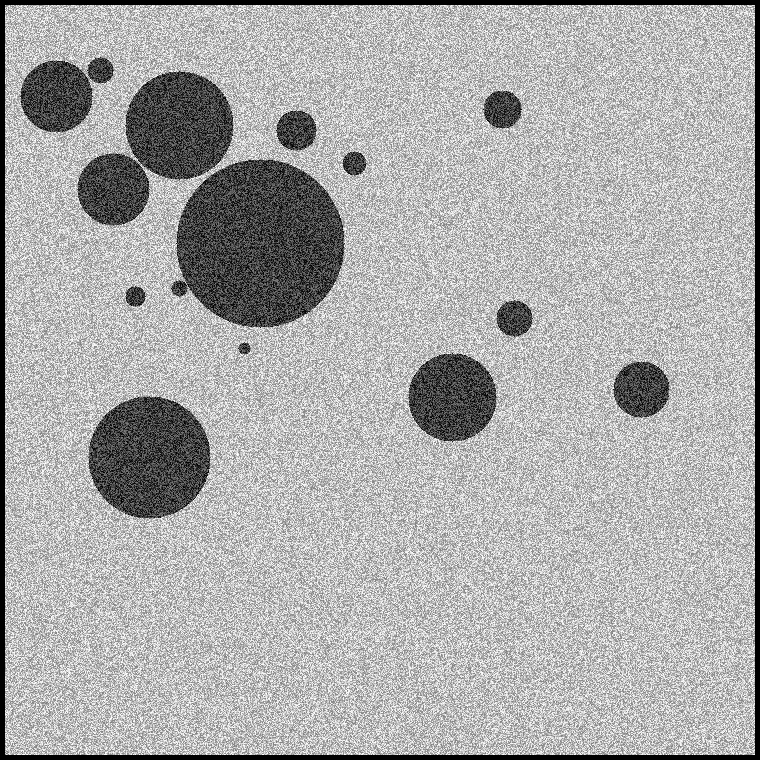

In [ ]:
M=150   #width of image 
N=150   #length of image
n=15    #number of discs to be added
r1=5    #lower limit of radius of the discs
r2=100  #upper limit of radius of the discs
mul=1   #initial multiplication factor=1
border=5 #width of border
Vf=[i for i in range(0,128)]    #possible intensity values of FG pixels of disc pixels
Vb=[i for i in range(128,256)]  #possible intensity values of BG pixels

discs={(int(np.random.uniform(r2,M-r2)),int(np.random.uniform(r2,N-r2))):int(np.random.uniform(r1,r2))}#initialization of discs dictionary containing center coordinates of discs and the radi
create_discs(M,N,n,r1,r2,mul,border,Vf,Vb)

#below is the ouput image

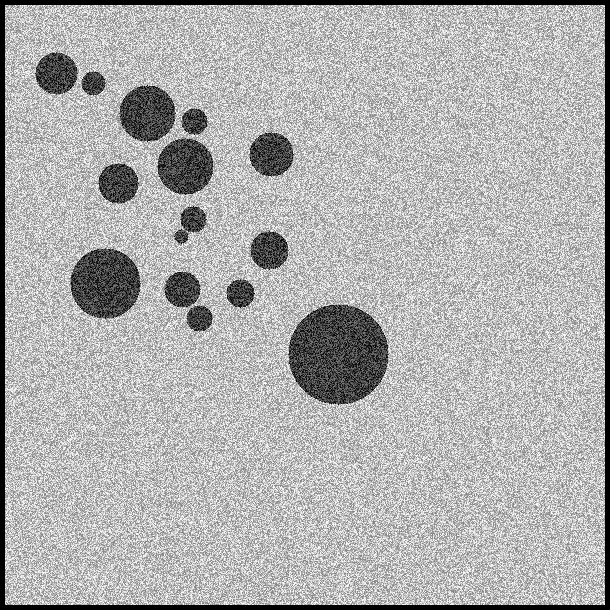

In [ ]:
discs={(int(np.random.uniform(r2,M-r2)),int(np.random.uniform(r2,N-r2))):int(np.random.uniform(r1,r2))}#initialization of discs dictionary containing center coordinates of discs and the radi
create_discs(M,N,n,r1,r2,mul,border,Vf,Vb)

#below is one of the another possible outputs for same set of params

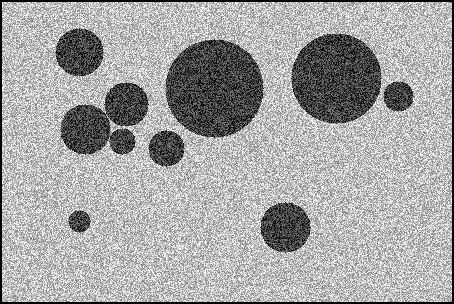

In [ ]:
M=100   #width of image 
N=150   #length of image
n=10    #number of discs to be added
r1=10    #lower limit of radius of the discs
r2=50  #upper limit of radius of the discs
mul=1   #initial multiplication factor=1
border=2 #width of border
Vf=[i for i in range(0,128)]    #possible intensity values of FG pixels of disc pixels
Vb=[i for i in range(128,256)]  #possible intensity values of BG pixels

discs={(int(np.random.uniform(r2,M-r2)),int(np.random.uniform(r2,N-r2))):int(np.random.uniform(r1,r2))}#initialization of discs dictionary containing center coordinates of discs and the radi
create_discs(M,N,n,r1,r2,mul,border,Vf,Vb)

#below is the ouput image for different set of params

In [ ]:
'''
Q2
Write a Matlab/Python function [cc] = Conncomp(I, connectivity, V ) to find all the connected components in
an Image using Sequential algorithm. The parameter connectivity may be either 4 or 8, while the parameter V
contains the set of intensity values to define connectivity. Compare your results with Matlab/Python’s inbuilt
function bwconncomp.
'''

In [ ]:
import numpy as np
import cv2  #for checking inbuilt function o/p

In [ ]:
#Below function will output the list of labels of the four connected neighbours of the input pixel
#label = 0 means BG pixel otherwise value of label signifies the connected component which contains the given pixel

def four_ngb_labels(x,y):
    l=0 #l is label of left neighbour
    t=0 #t is label of top neighbour
    
    #different cases to avoid error at boundaries
    if x!=0 and y!=0:
        for a in labels.values():
            if (x-1,y) in a:
                t=list(labels.keys())[list(labels.values()).index(a)]
            if (x,y-1) in a:
                l=list(labels.keys())[list(labels.values()).index(a)]
            
    elif y==0 and x!=0:
        for a in labels.values():
            if (x-1,y) in a:
                t=list(labels.keys())[list(labels.values()).index(a)]
        
    elif x==0 and y!=0:
        for a in labels.values():
            if (x,y-1) in a:
                l=list(labels.keys())[list(labels.values()).index(a)]       
                     
    return [l,t]

In [ ]:
#Below function will output the labels of the eight connected neighbours of the input pixel
#label = 0 means BG pixel otherwise value of label signifies the connected component which contains the given pixel

def eight_ngb_labels(x,y):
    l=0 #l is label of left neighbour
    t=0 #t is label of top neighbour
    d1=0 #d1 is label of left diagonal neighbour
    d2=0 #d2 is label of right diagonal neighbour
    
    #different cases to avoid error at boundaries
    if x!=0 and y!=0:
        for a in labels.values():
            if (x-1,y) in a:
                t=list(labels.keys())[list(labels.values()).index(a)]
            if (x,y-1) in a:
                l=list(labels.keys())[list(labels.values()).index(a)]
            if (x-1,y-1) in a:
                d1=list(labels.keys())[list(labels.values()).index(a)]
            if (x-1,y+1) in a and y+1<I.shape[1]:
                d2=list(labels.keys())[list(labels.values()).index(a)]
            
    elif y==0 and x!=0:
        for a in labels.values():
            if (x-1,y) in a:
                t=list(labels.keys())[list(labels.values()).index(a)]
            if (x-1,y+1) in a:
                d2=list(labels.keys())[list(labels.values()).index(a)]
        
    elif x==0 and y!=0:
        for a in labels.values():
            if (x,y-1) in a:
                l=list(labels.keys())[list(labels.values()).index(a)]       
                     
    return [l,t,d1,d2]

In [ ]:
#the below function can outputs connected component labeled pixel for 
#the given input image and dictionary containing pixel coordinates of connected componenst

def image_from_ccs(dic,I):
    I_=I
    for i,j in dic.items():
        for k in j:
            I_[k[0]][k[1]]=i
    return I_

In [ ]:
#below is the main fucntion performing connected component labelling
#its inputs are I=image array, connectivity = 4 connectivity or 8 connectivity, V=list of FG pixels

#initialization of dictionary where connected components and coordinates of pixels which are part of those connected components will be added
#here 0 connected components class contains coordinates of pixels whose intensity values are not in V
labels={0:[]}  

#intialization of dictionary where equivalent classes will be added
equivalent_classes={ }

def cc(I,connecticity,V):
        #two for loops performing raster order scanning
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                current_pixel_int=I[i][j]
                if current_pixel_int in V:
                    if connecticity==8:
                        ngb_label = eight_ngb_labels(i,j)
                    else:
                        ngb_label = four_ngb_labels(i,j)
                    ngb_label=list(filter(lambda a: a != 0, ngb_label)) #to remove all 0 labeles
                    if len(ngb_label)>0:
                        labels[min(ngb_label)].append((i,j))    #gets added to existing label class with minimum label value
                        if (list(set(ngb_label)) not in equivalent_classes.values()) and len(set(ngb_label))>1: 
                            equivalent_classes[len(equivalent_classes)+1] = list(set(ngb_label))    #adds eqivalent classes
                    else:
                        labels[len(labels)+1]=[(i,j)]   #adds new label class
                else:
                    labels[0].append((i,j)) #gets added to 0 class

        #merging equivalent classes           
        for i,j in equivalent_classes.items():
            for a in j:
                if a!=min(j):
                    labels[min(j)] = labels[min(j)] + labels[a]
                    labels.pop(a)

        #reassigning label classes in increasing order starting from 0
        labels_={}
        k=0
        for i,j in labels.items():
            labels_[k]=j
            k+=1

        #outputs number of connected components, dictionary containing key as class of connected component and value as list of pixel coordinates of that class
        return len(labels_),labels_

In [ ]:
#testing

#input image array
I=np.array([[1,1,0,1,1,2,0,0,0],
            [0,1,0,0,0,1,0,2,1],
            [0,0,0,0,0,0,1,2,1],
            [1,1,2,0,1,0,0,0,0]])

#list of FG pixels
V=[1,2]

num_of_ccs,ccs=cc(I,4,V)

In [ ]:
num_of_ccs

6

In [ ]:
ccs

{0: [(0, 2),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 6),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 3),
  (3, 5),
  (3, 6),
  (3, 7),
  (3, 8)],
 1: [(0, 0), (0, 1), (1, 1)],
 2: [(0, 3), (0, 4), (0, 5), (1, 5)],
 3: [(1, 7), (1, 8), (2, 7), (2, 8), (2, 6)],
 4: [(3, 0), (3, 1), (3, 2)],
 5: [(3, 4)]}

In [ ]:
I_=image_from_ccs(ccs,I) #labeled image I_
I_

array([[1, 1, 0, 2, 2, 2, 0, 0, 0],
       [0, 1, 0, 0, 0, 2, 0, 3, 3],
       [0, 0, 0, 0, 0, 0, 3, 3, 3],
       [4, 4, 4, 0, 5, 0, 0, 0, 0]])

In [ ]:
#cross checking with built in python function from cv2 library

I = np.array(I, dtype=np.uint8)
num_of_ccs,labeled_image = cv2.connectedComponents(I,connectivity=4)

In [ ]:
num_of_ccs

6

In [ ]:
labeled_image

array([[1, 1, 0, 2, 2, 2, 0, 0, 0],
       [0, 1, 0, 0, 0, 2, 0, 3, 3],
       [0, 0, 0, 0, 0, 0, 3, 3, 3],
       [4, 4, 4, 0, 5, 0, 0, 0, 0]], dtype=int32)

In [ ]:
#from above outputs we can see that function written by user and built in fuction both are giving same outputs
#this implies that user defined function cc is working properly